In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(640, 640)
(640, 640)


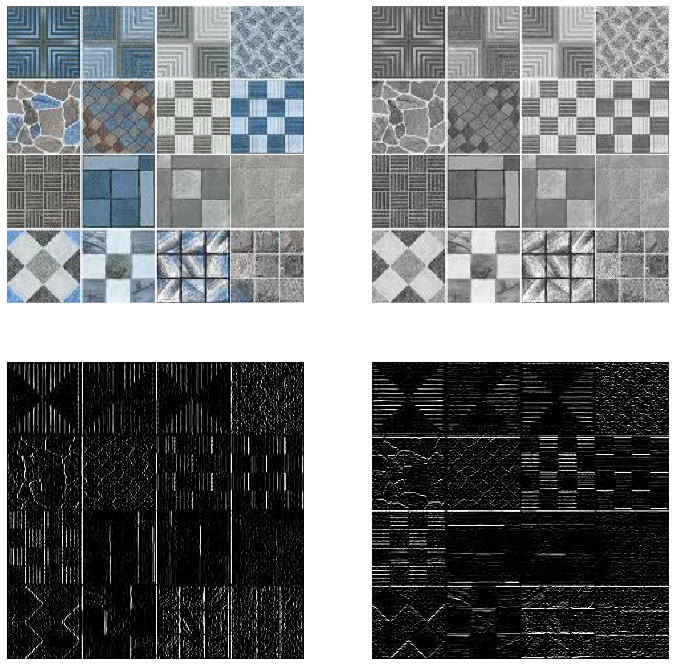

In [2]:
image = cv2.imread("tiles.jpg", cv2.IMREAD_COLOR)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

vertical_kernel = np.array([
  [1, 0, -1],
  [1, 0, -1],
  [1, 0, -1]
])

horizontal_kernel = np.array([
   [1, 1, 1],
  [0, 0, 0],
  [-1, -1, -1]
])

vertical_edges = cv2.filter2D(gray, -1, vertical_kernel)
horizontal_edges = cv2.filter2D(gray, -1, horizontal_kernel)

_, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()

axs[0].axis("off") 
axs[0].imshow(image)

axs[1].axis("off") 
axs[1].imshow(gray, cmap="gray")

axs[2].axis("off") 
axs[2].imshow(vertical_edges, cmap="gray")

axs[3].axis("off") 
axs[3].imshow(horizontal_edges, cmap="gray")

print(gray.shape)
print(vertical_edges.shape)


In [3]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
from tensorflow import keras

from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(5)

def define_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(1, 
        kernel_size = (3, 3), 
        padding = "same", activation='relu', 
        kernel_initializer='he_uniform',
        name='learned_kernel', 
        input_shape=(640, 640, 1)))

    model.compile(loss=keras.losses.MeanSquaredError(),
            optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
            metrics=['mse'])

    model.summary()

    return model

model = define_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 learned_kernel (Conv2D)     (None, 640, 640, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [4]:
gray_input = np.asarray([gray]).reshape(1, 640, 640).astype("float32") / 255.0
output = np.asarray([vertical_edges]).reshape(1, 640, 640).astype("float32") / 255.0

X = np.asarray(gray_input)
Y = np.asarray(output)

# since there is one input only overfitting is very probable
history = model.fit(X, Y, epochs=1000, verbose=0)


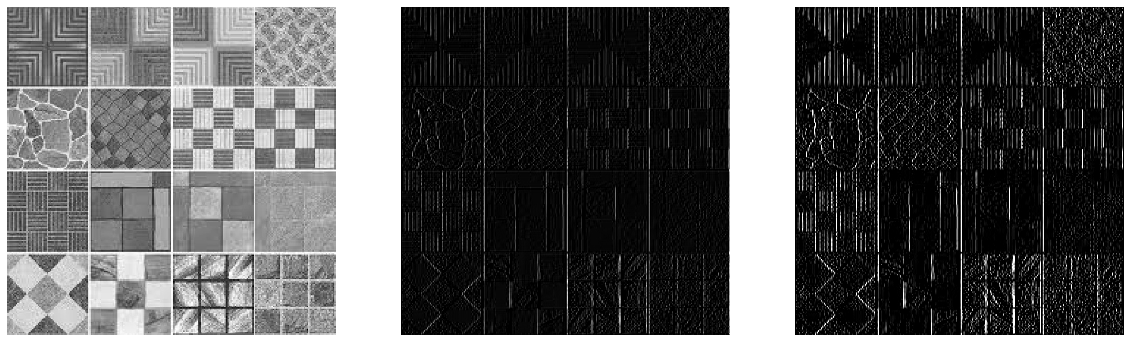

In [5]:
output_image = model(gray_input[0].reshape(1, 640, 640)).numpy().reshape(640, 640)

_, axs = plt.subplots(1, 3, figsize=(20, 12))
axs = axs.flatten()

axs[0].axis("off") 
axs[0].imshow(gray_input.reshape(640, 640), cmap="gray")

axs[1].axis("off") 
axs[1].imshow(output_image, cmap="gray")

axs[2].axis("off") 
axs[2].imshow(vertical_edges, cmap="gray")



In [6]:
learned_kernel = model.get_layer("learned_kernel")
weights = learned_kernel.get_weights()[0]

print(np.matrix(weights))
print(np.matrix(vertical_kernel))

[[ 0.51241547 -0.11407822 -0.1274762 ]
 [ 0.53612214 -0.18007001 -0.6084439 ]
 [ 0.94823396 -0.12034448 -0.81665343]]
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
